<a href="https://colab.research.google.com/github/wandalistathea/binary-image-classification/blob/main/Kaggle_Image_Classification_(Dogs_%26_Cats).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==1.15

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import optimizers
from tensorflow.keras import layers, models

from google.colab import files
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join

In [ ]:
# Source data: https://www.kaggle.com/chetankv/dogs-cats-images
# Data dari Kaggle (10k data) hanya diambil masing-masing training set = 400 dan masing-masing test set = 100

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/dog vs cat"

test_set  training_set


In [ ]:
# Setting direktori training set dan test set
train_dir = "/content/drive/My Drive/dog vs cat/training_set/"
test_dir = "/content/drive/My Drive/dog vs cat/test_set/"

In [ ]:
# Cek isi dari folder
os.listdir(train_dir)

['dogs', 'cats']

### Coba Satu Gambar

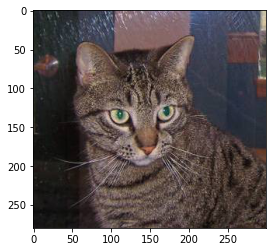

In [ ]:
# Coba lihat gambar
coba_img = image.load_img(train_dir + "cats/cat.1.jpg")
plt.imshow(coba_img)

In [ ]:
# Gambar jadikan array
img_array = image.img_to_array(coba_img)
img_array

array([[[ 39.,  44.,  40.],
        [ 39.,  44.,  40.],
        [ 40.,  44.,  43.],
        ...,
        [207., 204., 171.],
        [202., 199., 164.],
        [201., 199., 161.]],

       [[ 40.,  45.,  41.],
        [ 40.,  45.,  41.],
        [ 40.,  44.,  43.],
        ...,
        [203., 200., 169.],
        [199., 196., 161.],
        [197., 195., 157.]],

       [[ 40.,  45.,  41.],
        [ 40.,  45.,  41.],
        [ 40.,  44.,  43.],
        ...,
        [199., 196., 165.],
        [198., 195., 162.],
        [198., 195., 160.]],

       ...,

       [[ 32.,  30.,  31.],
        [ 30.,  28.,  29.],
        [ 26.,  24.,  25.],
        ...,
        [ 36.,  23.,  17.],
        [ 43.,  30.,  24.],
        [ 57.,  46.,  40.]],

       [[ 32.,  30.,  31.],
        [ 30.,  28.,  29.],
        [ 26.,  24.,  25.],
        ...,
        [ 42.,  29.,  21.],
        [ 46.,  33.,  25.],
        [ 55.,  45.,  36.]],

       [[ 32.,  30.,  31.],
        [ 29.,  27.,  28.],
        [ 25.,  

In [ ]:
img_array2 = img_array.reshape((1, ) + img_array.shape)
img_array2.shape # Bentuk yang seperti ini yang dibutuhkan keras

(1, 280, 300, 3)

In [ ]:
#hasil_gen = train_datagen.flow(img_array2, batch_size = 1)
count = 0
for batch in train_datagen.flow(img_array2, batch_size = 1, save_to_dir = "hasil_gen"):
  count += 1
  if count == 10:
    break

print("10 gambar hasil generator berhasil disimpan!")

10 gambar hasil generator berhasil disimpan!


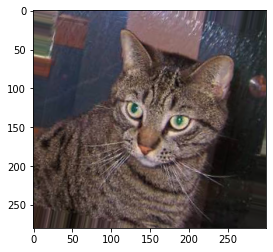

In [ ]:
a = image.load_img("hasil_gen/_0_9525.png") # Gambar hasil generator
plt.imshow(a)

### Image Data Generator

In [ ]:
# Image Data Generator
# Data Augmentation -> untuk memproduksi lebih banyak sampel padahal hanya dari satu gambar

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 30, 
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = "nearest")

# Kalau test set hanya di-rescale aja, bukan untuk memperbanyak sampel
test_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150), 
    class_mode = "binary")

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150), 
    class_mode = "binary")

Found 808 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices) 
# Kode kelasnya, berarti ini bukan menggunakan One Hot Encoding, tapi langsung kodenya

{'cats': 0, 'dogs': 1}


### Pembentukan Model

In [ ]:
# Membuat arisektur untuk modelnya

# Conv2D -> Two dimensional convolutional model
# 32 -> Input for next layer
# (3, 3) -> Convolutional window size

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = "relu", input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    #
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    #
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    ##
    tf.keras.layers.Flatten(), # Output convert into one dimensional layer and will go to Dense layer
    ##
    tf.keras.layers.Dense(64, activation = "relu"),
    ##
    tf.keras.layers.Dropout(0.2), # Drop 20% dari neuron at random (biar lebih generalisasi dan running-nya cepat)
    ##
    tf.keras.layers.Dense(1, activation = "sigmoid") # 1 karena tadi output-nya bukan One Hot Encoding, tapi langsung kode
    ])

In [ ]:
model.compile(loss = "binary_crossentropy", 
              optimizer = optimizers.RMSprop(), 
              metrics = ["accuracy"])

In [ ]:
history = model.fit(
    train_generator, 
    steps_per_epoch = 32,
    epochs = 20,
    validation_data = test_generator, 
    validation_steps = 8, 
    verbose = 2)

Epoch 1/20
Epoch 1/20
32/32 - 12s - loss: 0.7130 - acc: 0.5020 - val_loss: 0.6905 - val_acc: 0.4957
Epoch 2/20
Epoch 1/20
32/32 - 10s - loss: 0.6995 - acc: 0.5330 - val_loss: 0.6859 - val_acc: 0.5216
Epoch 3/20
Epoch 1/20
32/32 - 10s - loss: 0.6867 - acc: 0.5470 - val_loss: 0.6706 - val_acc: 0.5388
Epoch 4/20
Epoch 1/20
32/32 - 10s - loss: 0.6850 - acc: 0.5820 - val_loss: 0.6626 - val_acc: 0.6379
Epoch 5/20
Epoch 1/20
32/32 - 10s - loss: 0.6839 - acc: 0.6090 - val_loss: 0.6450 - val_acc: 0.6552
Epoch 6/20
Epoch 1/20
32/32 - 10s - loss: 0.7115 - acc: 0.6588 - val_loss: 0.6133 - val_acc: 0.6336
Epoch 7/20
Epoch 1/20
32/32 - 10s - loss: 0.6410 - acc: 0.6610 - val_loss: 0.5973 - val_acc: 0.6379
Epoch 8/20
Epoch 1/20
32/32 - 10s - loss: 0.5889 - acc: 0.6900 - val_loss: 0.8569 - val_acc: 0.4957
Epoch 9/20
Epoch 1/20
32/32 - 10s - loss: 0.5929 - acc: 0.6930 - val_loss: 0.6200 - val_acc: 0.6595
Epoch 10/20
Epoch 1/20
32/32 - 10s - loss: 0.5807 - acc: 0.7010 - val_loss: 0.5744 - val_acc: 0.6810

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


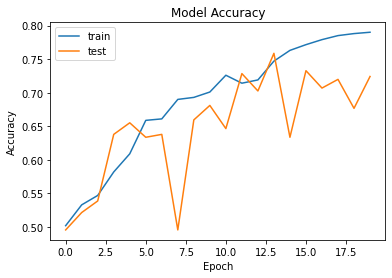

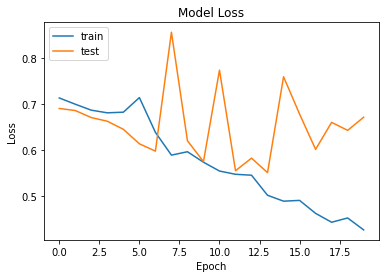

In [ ]:
# List all data in history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

# Summarize history for loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

### Prediksi Data Baru

In [ ]:
# Prediksi Data Baru
predict_dir = "/content/drive/My Drive/dog vs cat/predict_set/"
list_files = [f for f in listdir(predict_dir) if isfile(join(predict_dir, f))]
list_files

['dog.4998.jpg',
 'dog.5000.jpg',
 'dog.4999.jpg',
 'dog.4997.jpg',
 'dog.4996.jpg',
 'cat.5000.jpg',
 'cat.4999.jpg',
 'cat.4998.jpg',
 'cat.4997.jpg',
 'cat.4996.jpg']

In [ ]:
# Predicting Images
dog_counter = 0
cat_counter = 0

for i in list_files:
  img = image.load_img(predict_dir + i, target_size = (150, 150))
  X = image.img_to_array(img)
  X = np.expand_dims(X, axis = 0)

  images = np.vstack([X])
  classes = model.predict_classes(images, batch_size = 10)
  classes = classes[0][0]

  if classes == 0:
    print(i + ": cat")
    cat_counter += 1
  elif classes == 1:
    print(i + ": dog")
    dog_counter += 1

print("Total Cats: ", cat_counter)
print("Total Dogs: ", dog_counter)

dog.4998.jpg: cat
dog.5000.jpg: dog
dog.4999.jpg: dog
dog.4997.jpg: dog
dog.4996.jpg: dog
cat.5000.jpg: cat
cat.4999.jpg: dog
cat.4998.jpg: cat
cat.4997.jpg: cat
cat.4996.jpg: cat
Total Cats:  5
Total Dogs:  5


Saving dog.4998.jpg to dog.4998.jpg
dog.4998.jpg
cat


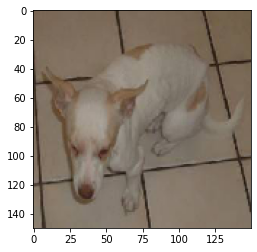

In [ ]:
# Prediksi denga cara upload gambar
uploaded = files.upload()

for fn in uploaded.keys():

  # Predicting images
  path = fn
  img = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  
  X = image.img_to_array(img)
  X = np.expand_dims(X, axis = 0)
  images = np.vstack([X])
  classes = model.predict(images, batch_size = 10)
  
  print(fn)

  if classes == 0:
    print("cat")
  elif classes == 1:
    print("dog")
  else:
    print("unknown")